In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
rawDF = pd.read_csv("data.csv")

In [3]:
rawDF.head()

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English


In [4]:
rawDF.isna().sum()

# no na values, YAY

track id              0
 genre                0
 amazement            0
 solemnity            0
 tenderness           0
 nostalgia            0
 calmness             0
 power                0
 joyful_activation    0
 tension              0
 sadness              0
 mood                 0
 liked                0
 disliked             0
 age                  0
 gender               0
 mother tongue        0
dtype: int64

In [5]:
categoricalCols = [" genre", " mother tongue"]
numericalBarCols = [" mood", " age"]
numericalPieCols = [" amazement", " solemnity", " tenderness", " nostalgia", " calmness", " power",
                 " joyful_activation", " tension", " sadness", " liked", " disliked", " gender"]

# I chose to exclude track id because it is not really relevant

categoricalCols

[' genre', ' mother tongue']

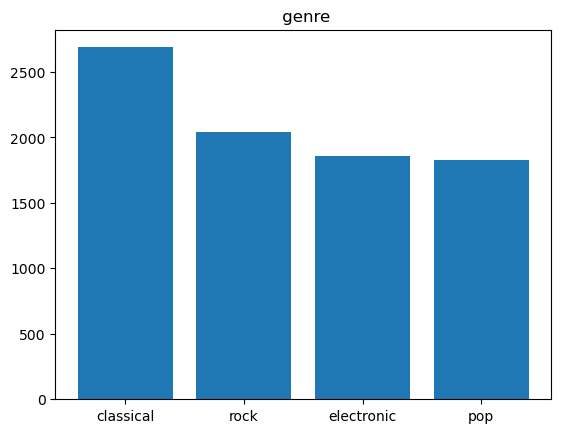

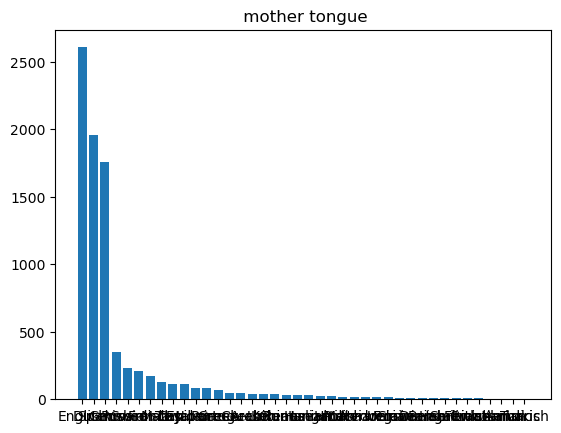

In [6]:
for c in categoricalCols:
    plt.bar(rawDF[c].unique(),rawDF[c].value_counts(), label=c)
    plt.title(c)
    plt.show()

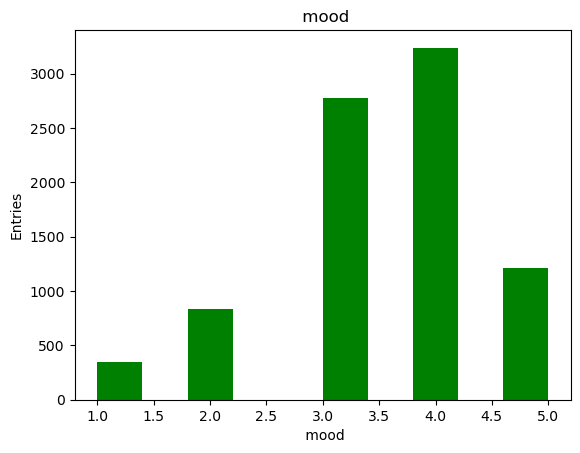

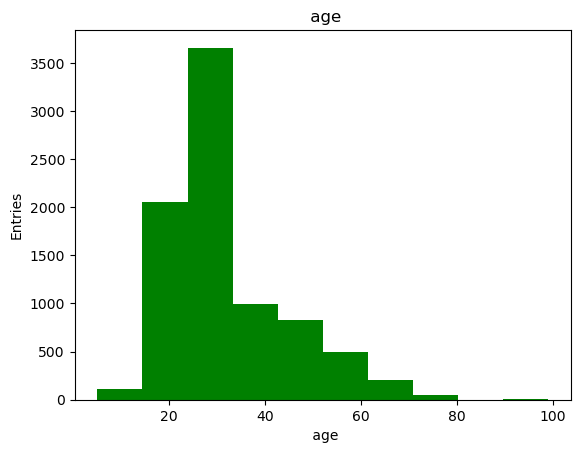

In [7]:
for n in numericalBarCols:
    plt.title(n)
    plt.hist(rawDF[n],color="green")
    plt.xlabel(n)
    plt.ylabel("Entries")
    plt.show()

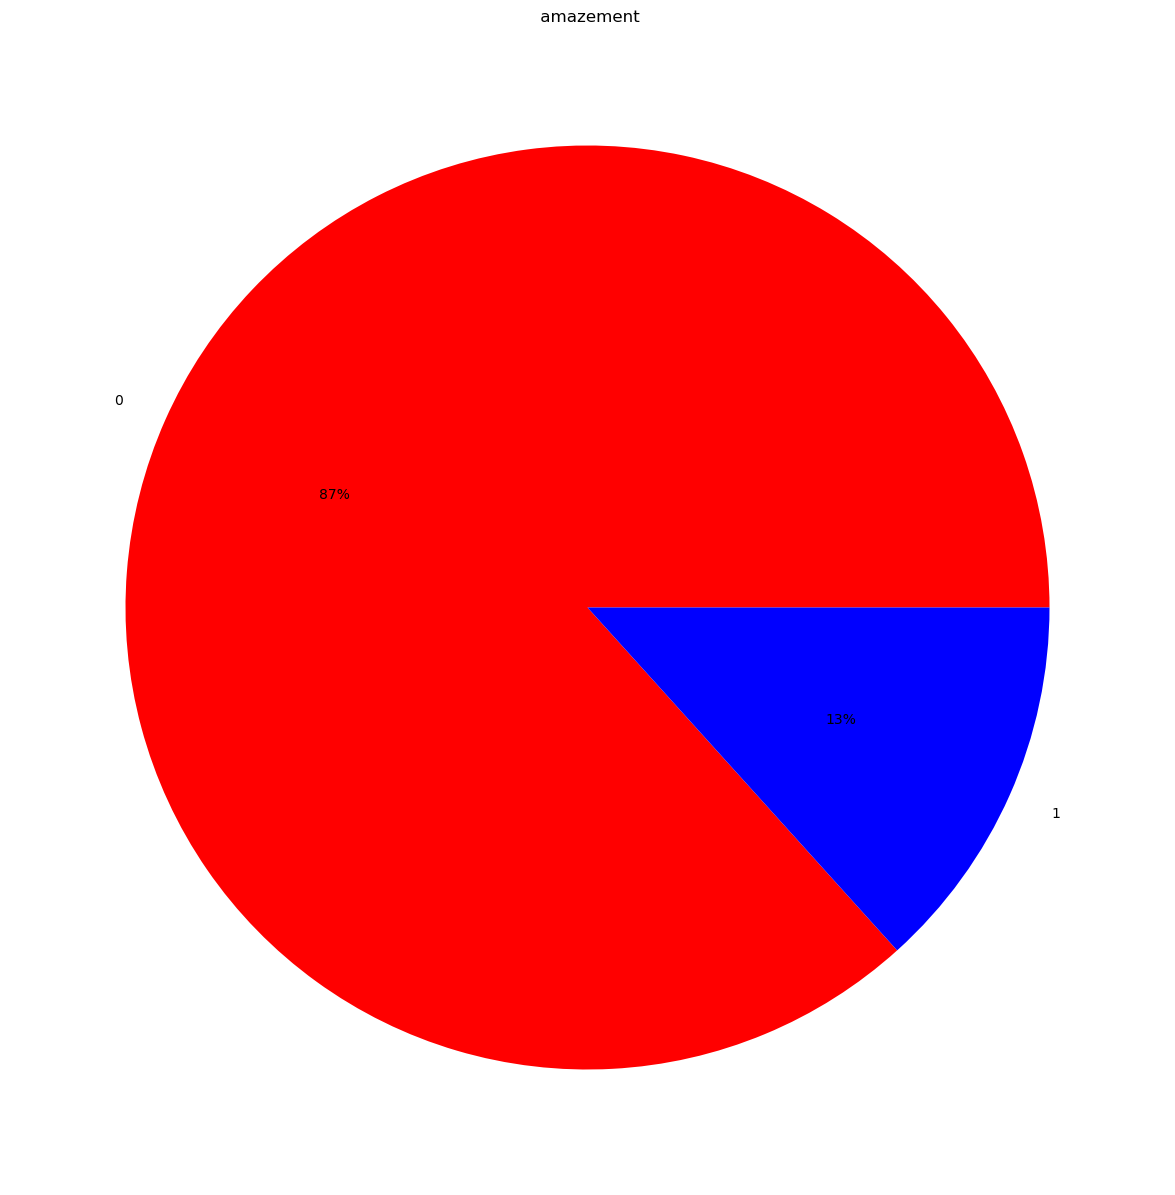

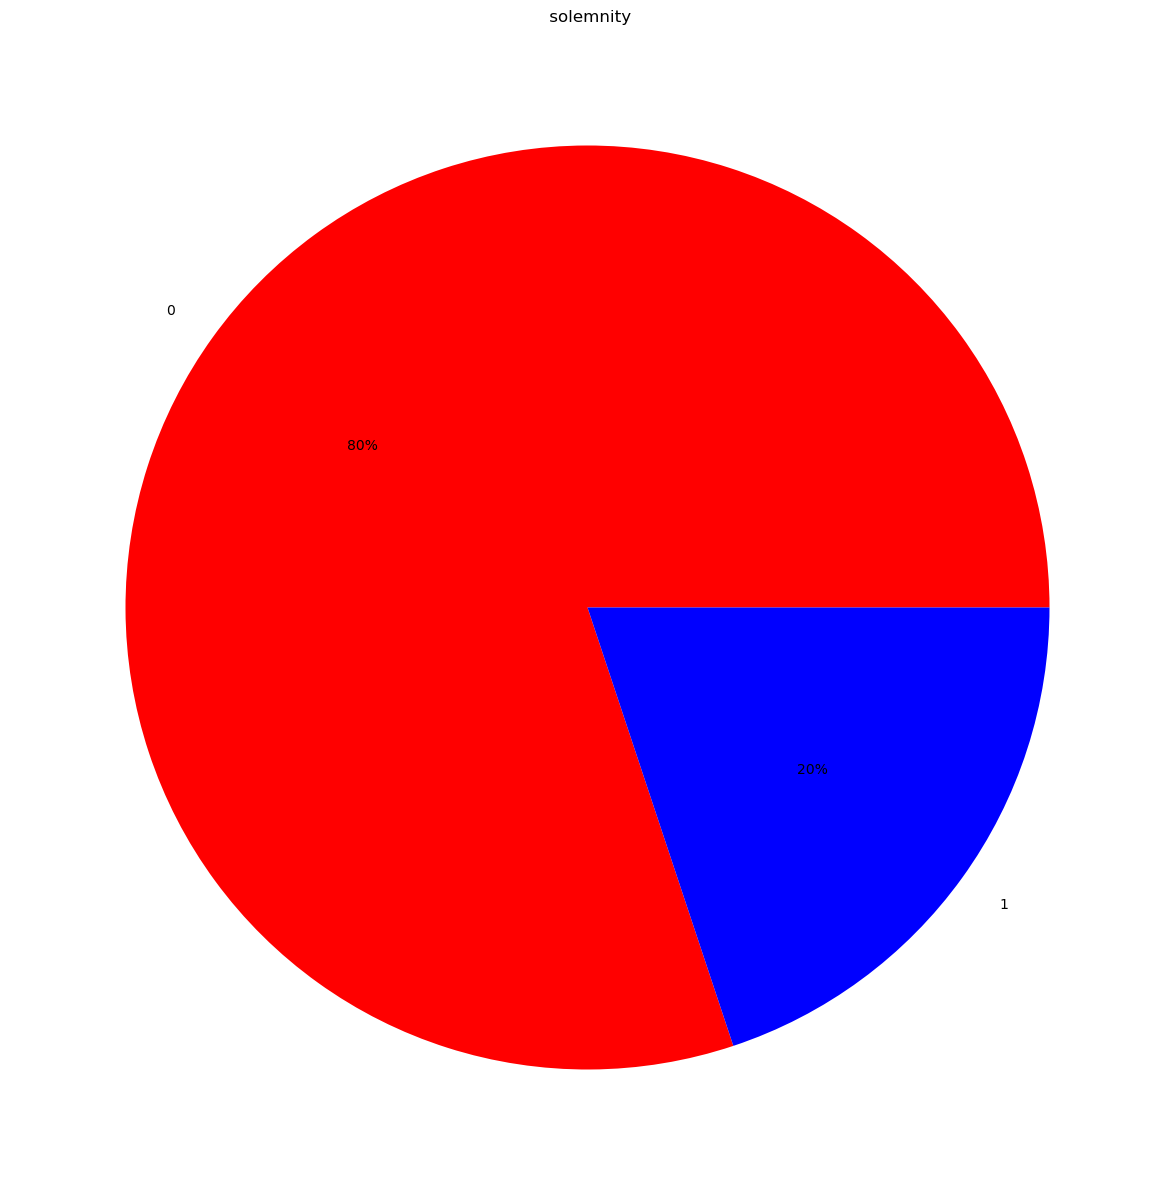

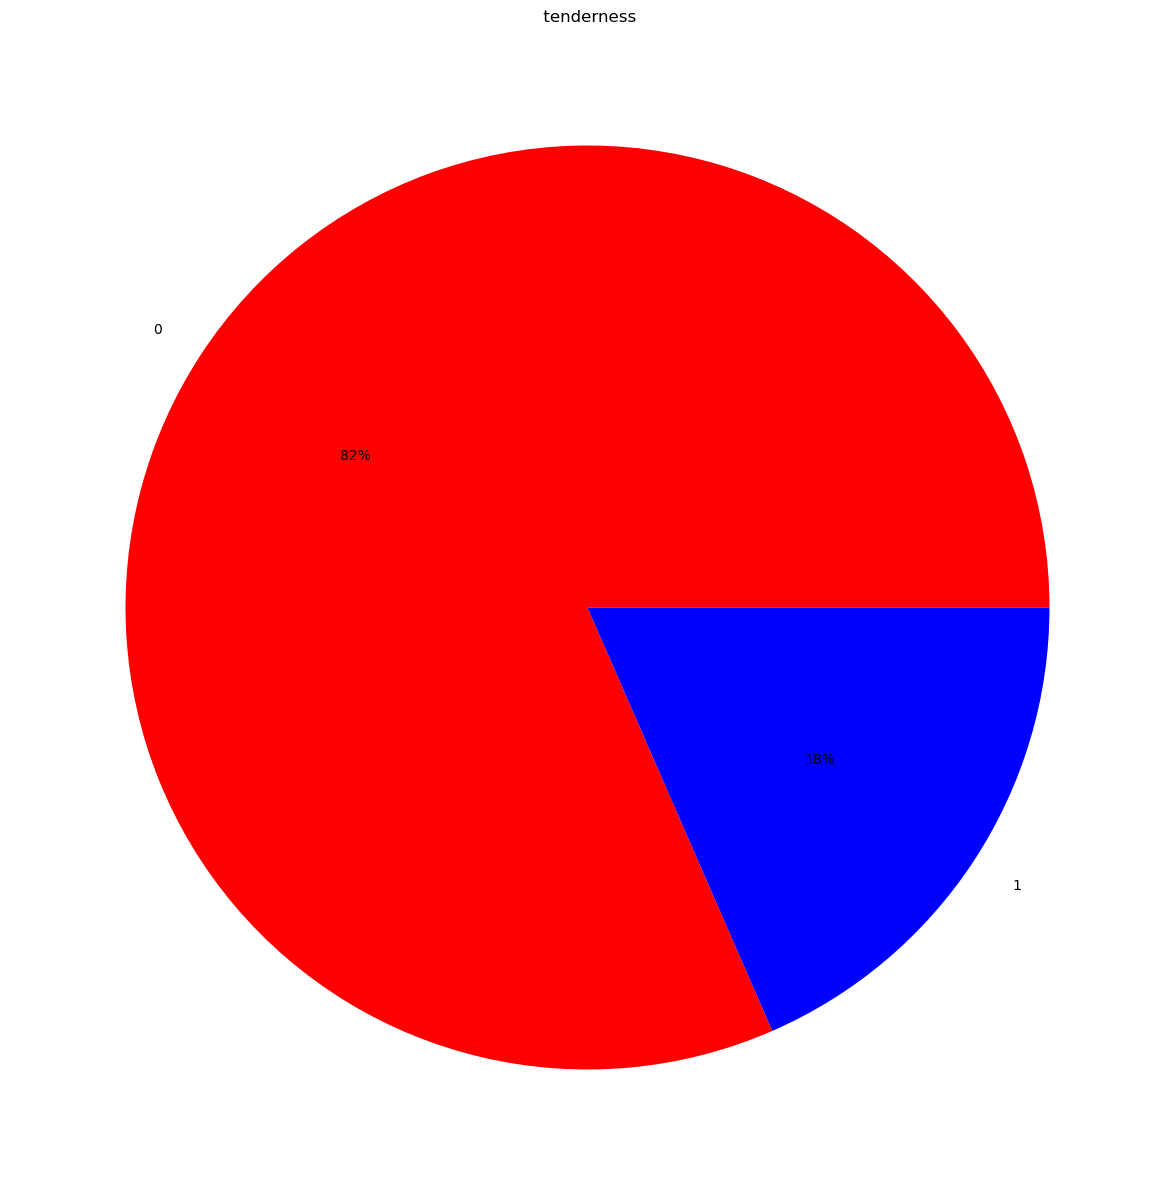

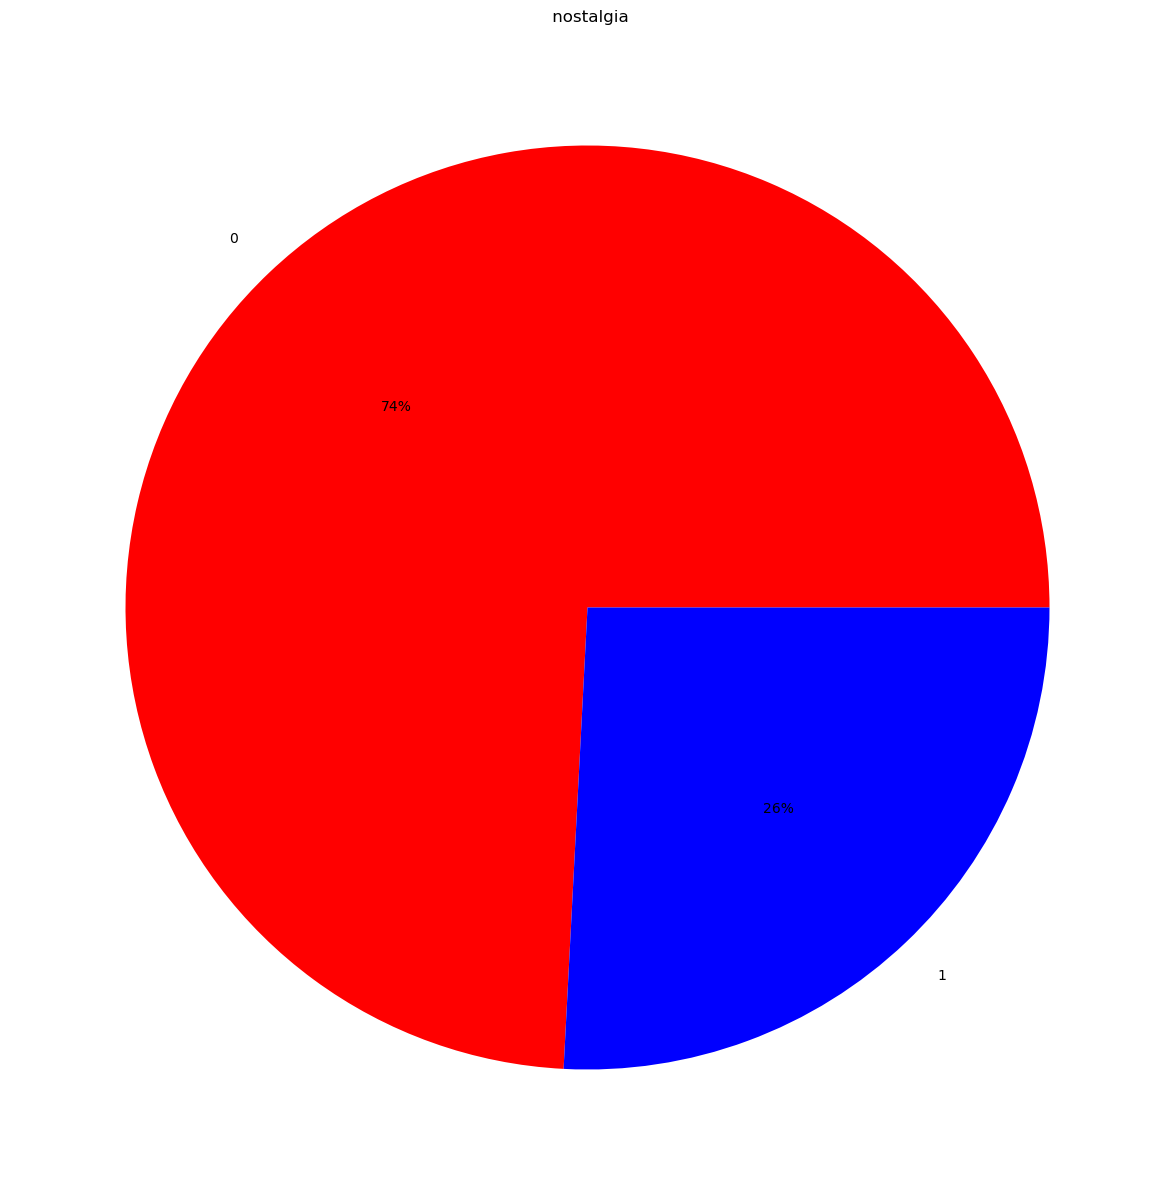

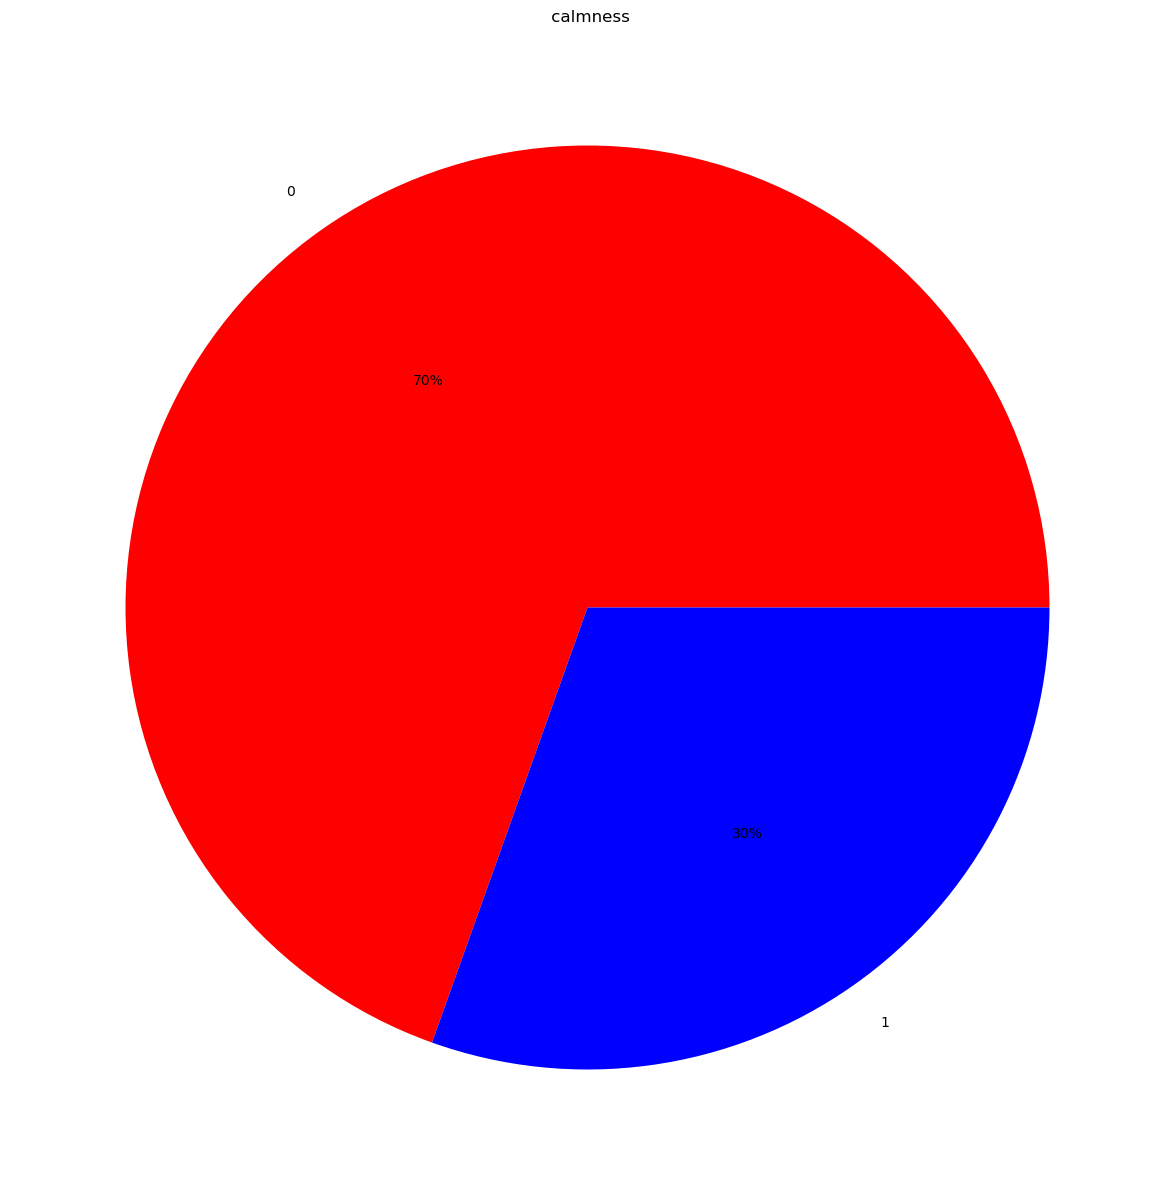

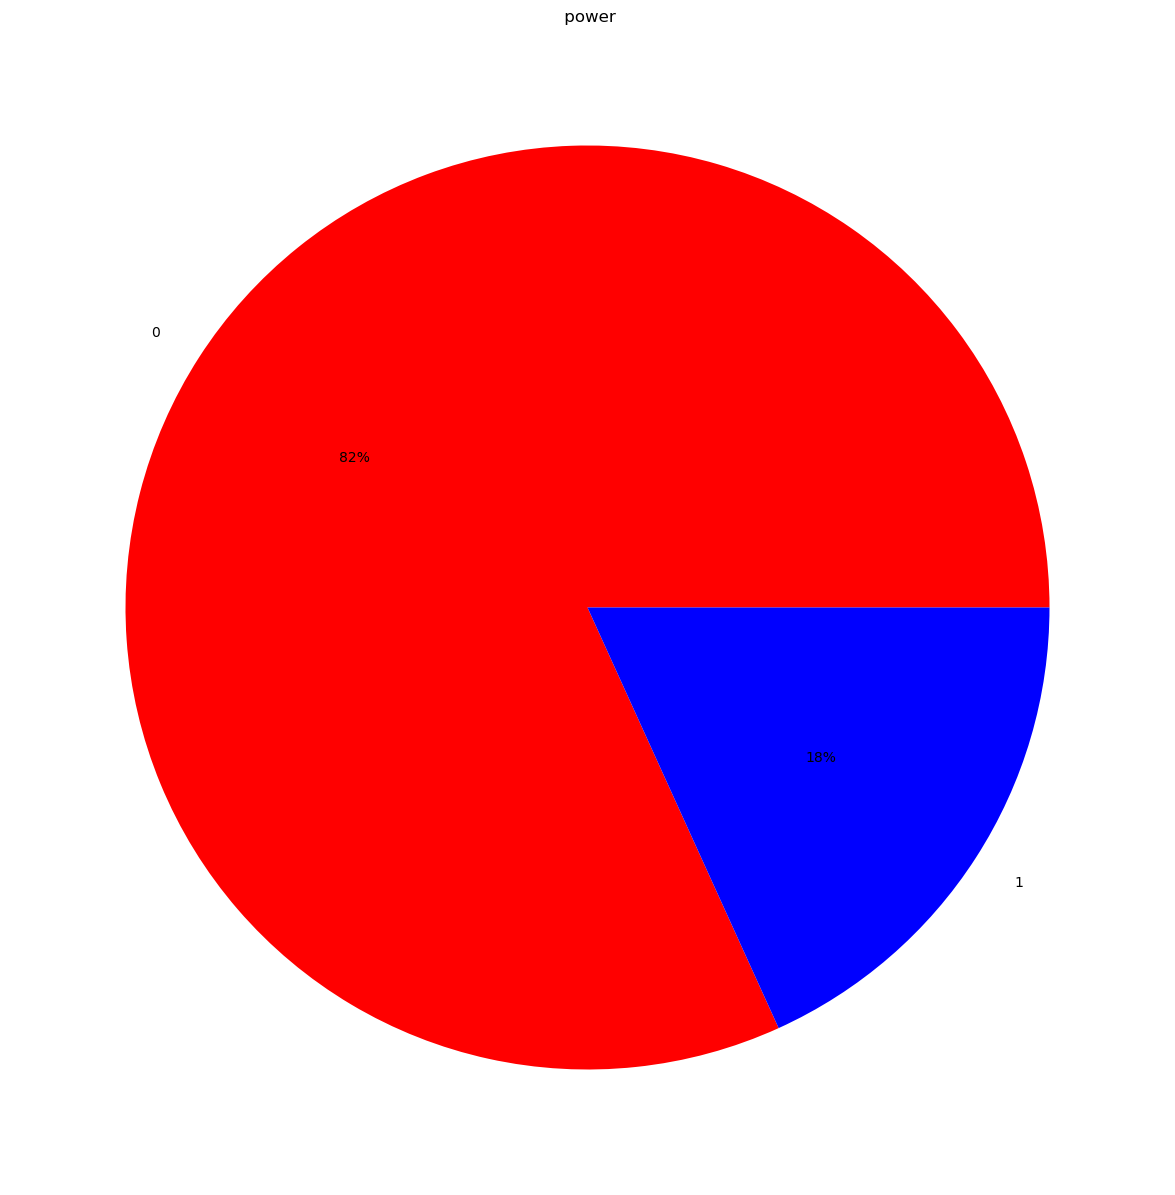

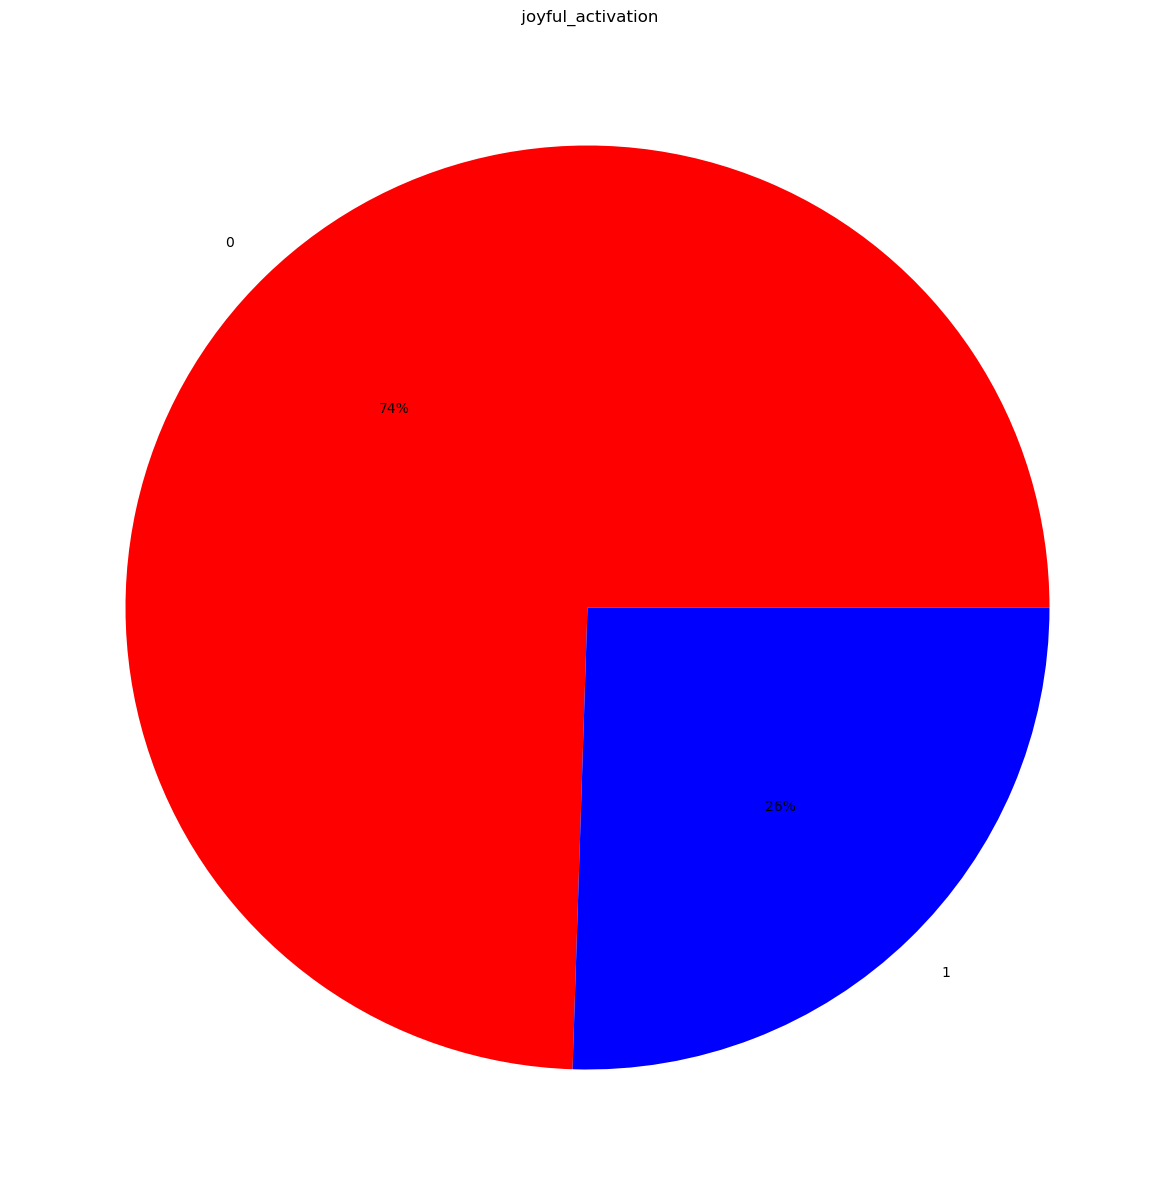

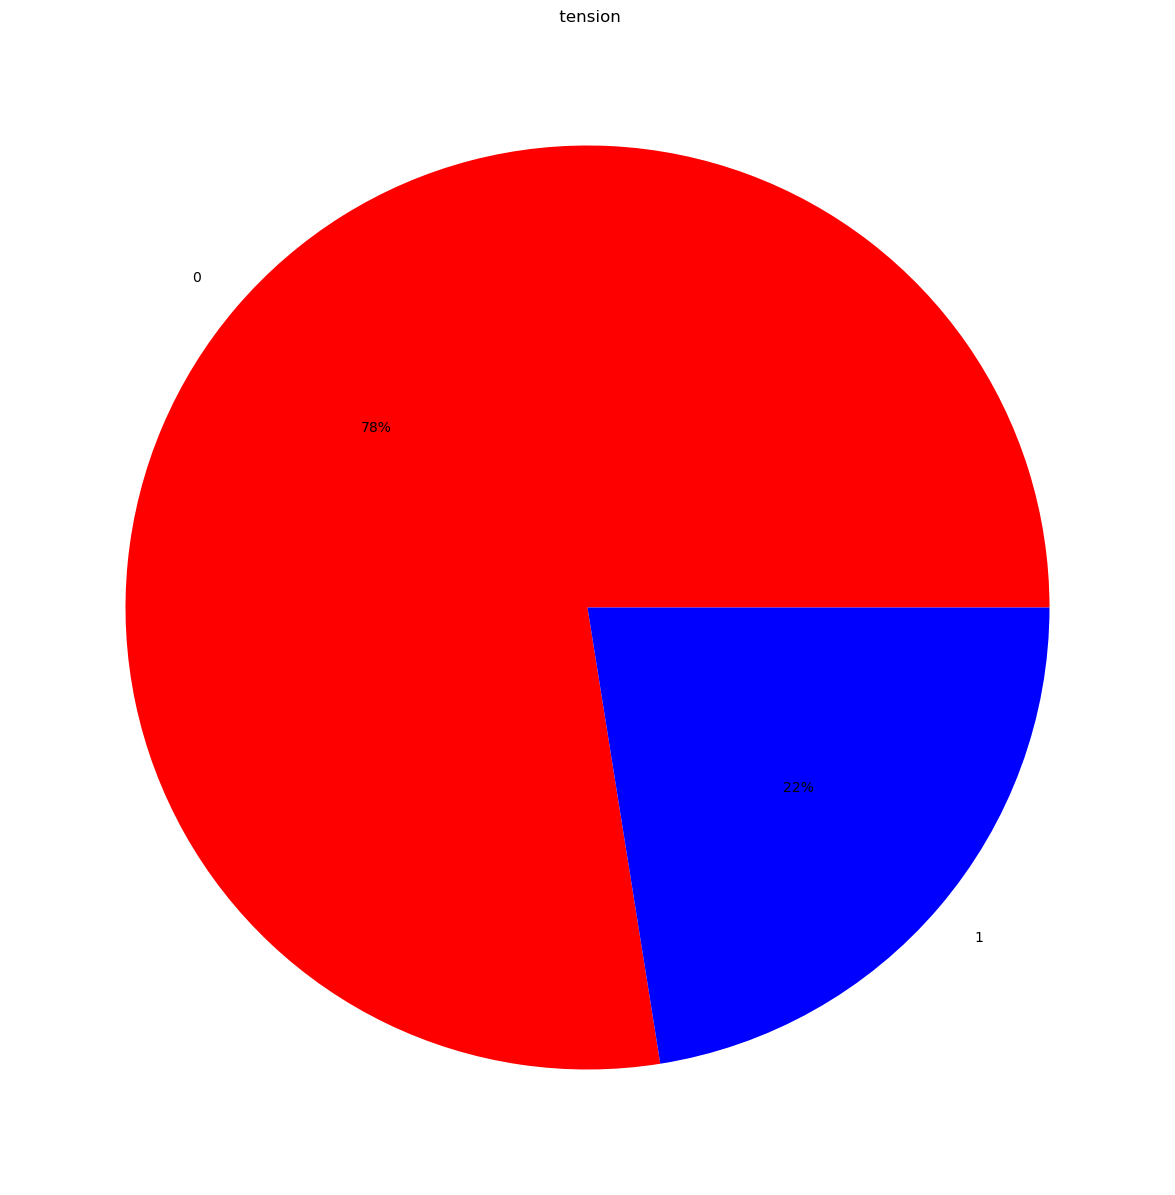

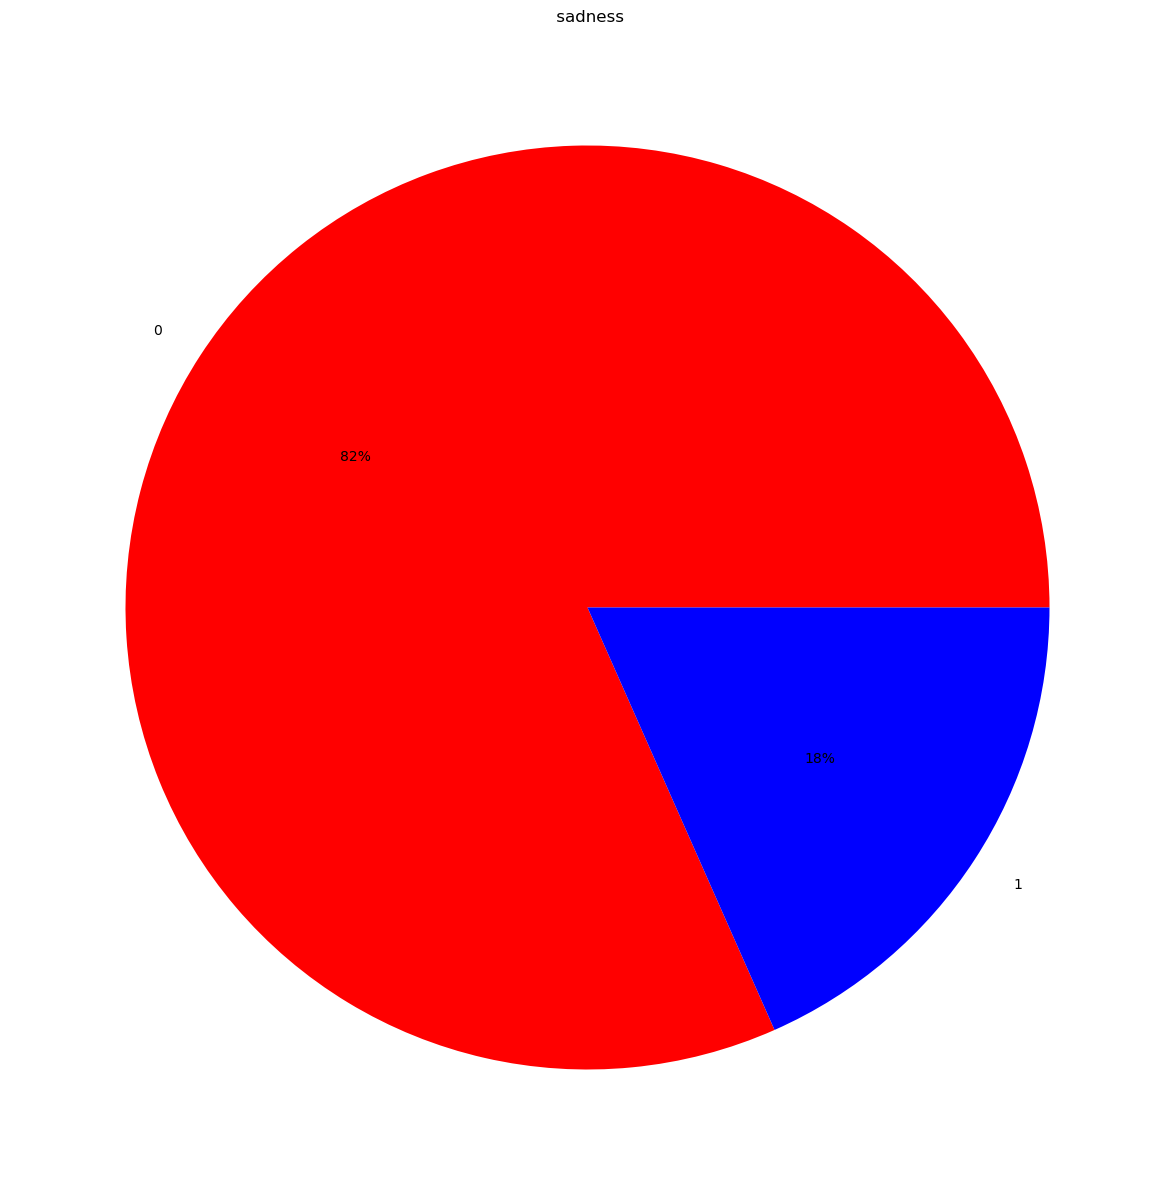

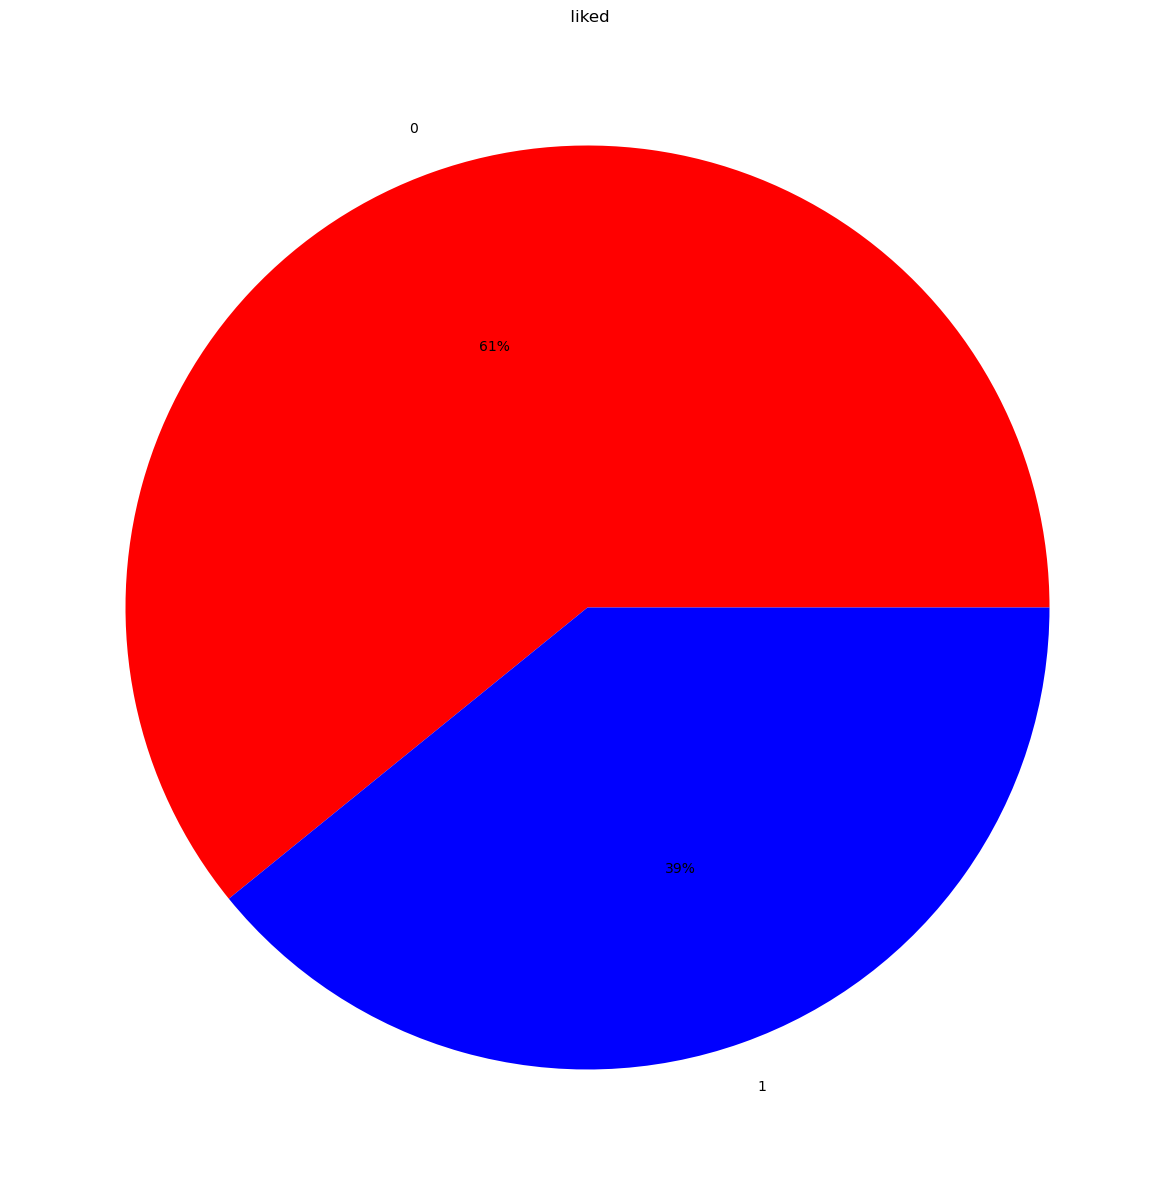

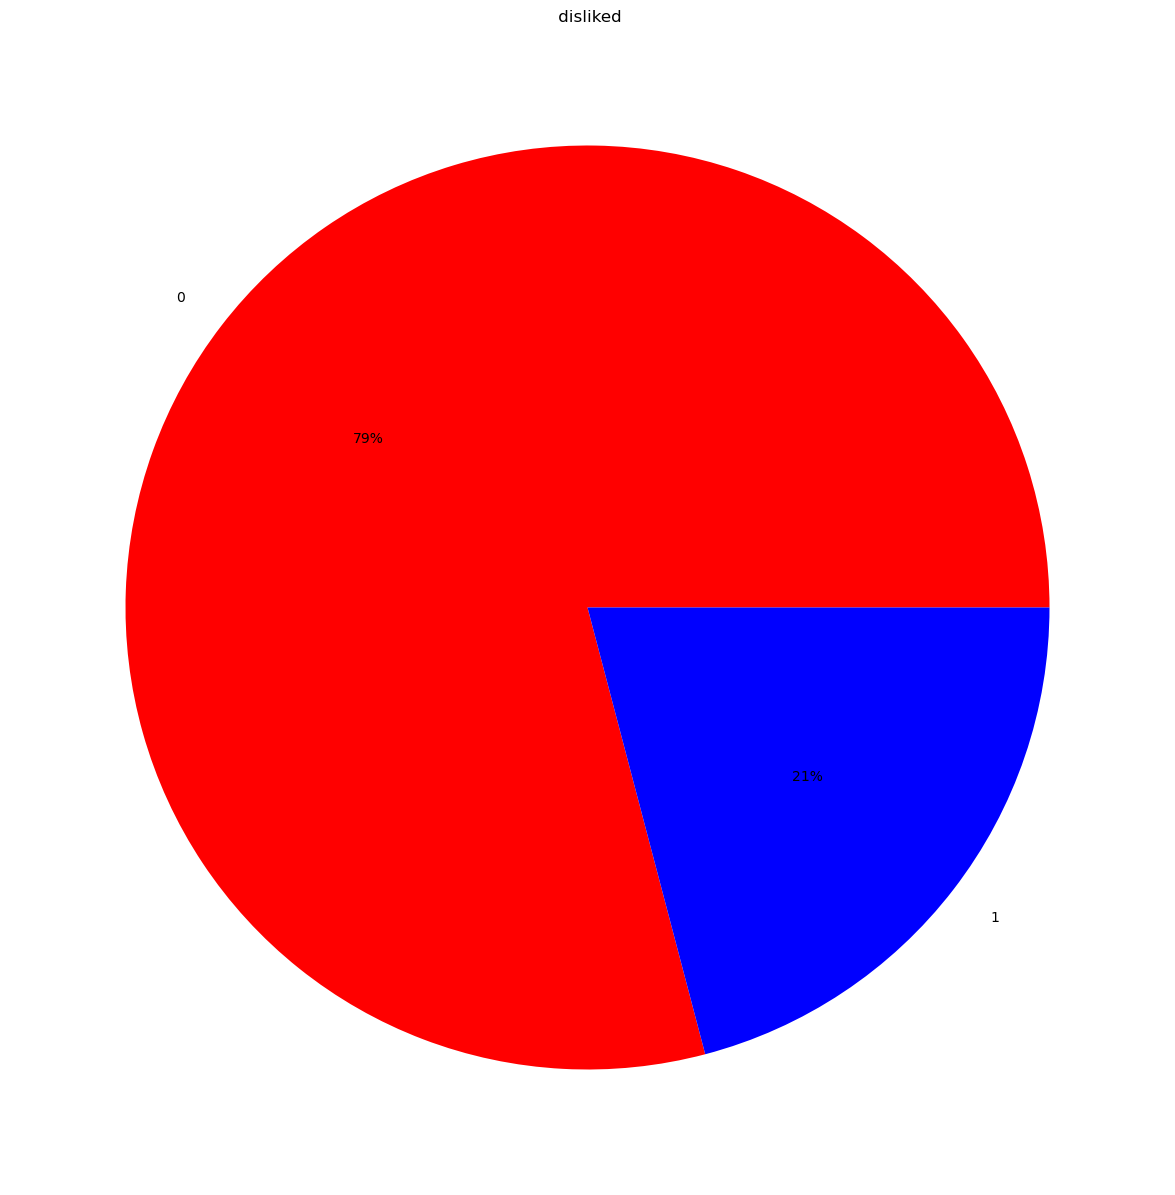

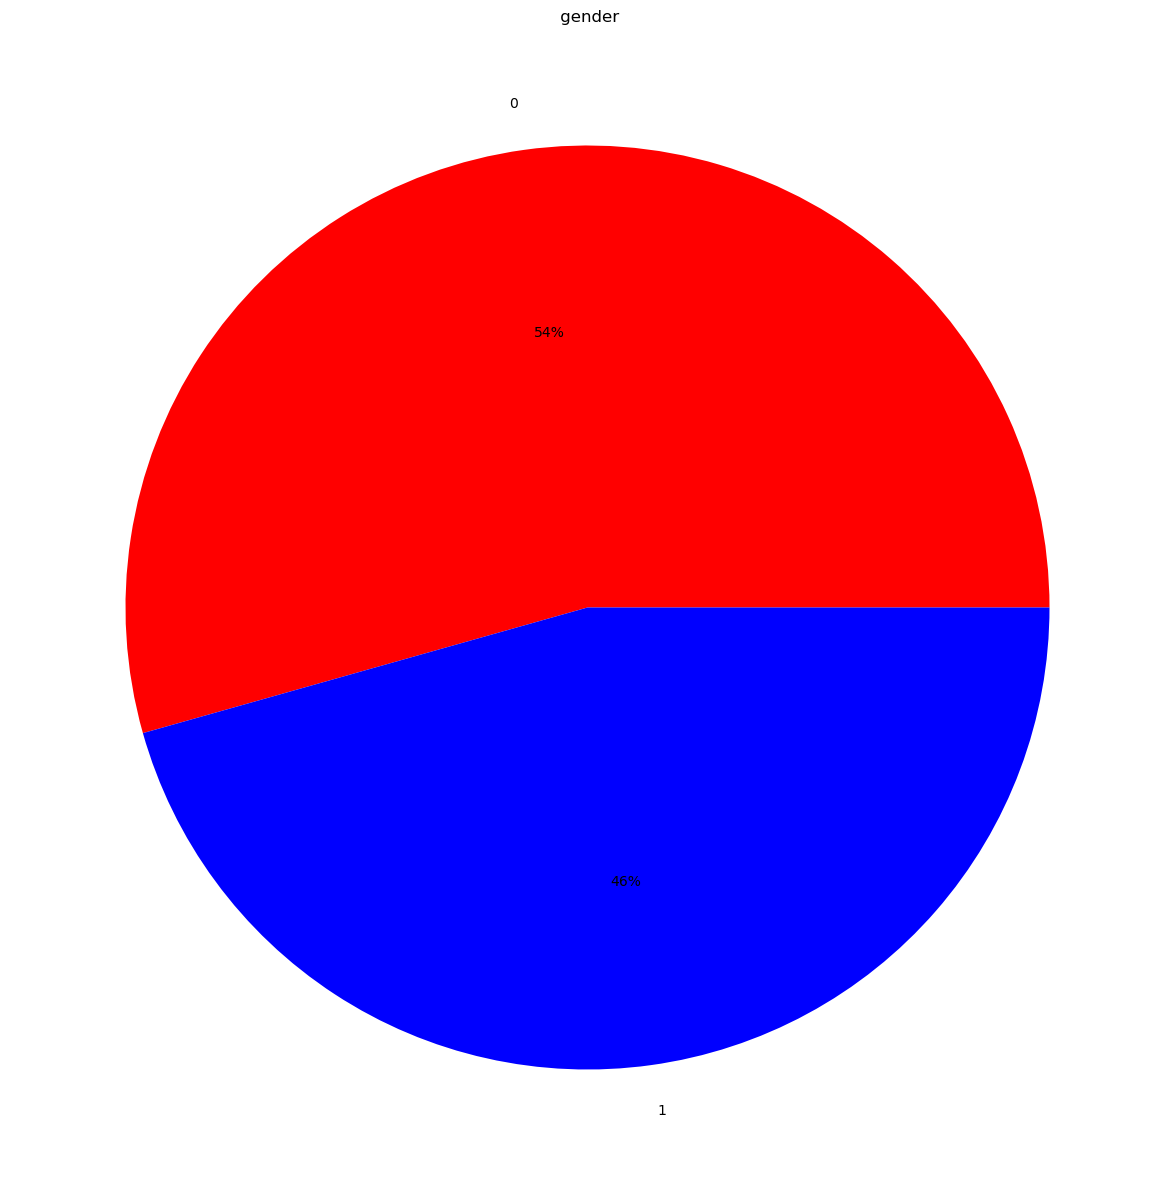

In [8]:
for n in numericalPieCols:
    fig, ax = plt.subplots(1,figsize=(15,15))

    nGroup = rawDF.groupby(n).size()

    plt.title(n)
    ax.pie(x=nGroup,
        labels=nGroup.index,
        autopct = '%1.0f%%',
        colors=['red','blue'])

In [9]:
from sklearn.preprocessing import OneHotEncoder

# instantiate and fit the one hot encoder
encoder = OneHotEncoder(sparse=False)
encoderArray = encoder.fit_transform(rawDF[categoricalCols])
colNames = encoder.get_feature_names_out()

# fix the shape
colNames = np.array(colNames).ravel()

# get the dataframe of the 
oneHotDF = pd.DataFrame(encoderArray, columns=colNames)

oneHotDF.head()

/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,genre_classical,genre_electronic,genre_pop,genre_rock,mother tongue_Amharic,mother tongue_Arabic,mother tongue_Bengali,mother tongue_Catalan,mother tongue_Chinese,mother tongue_Croatian,...,mother tongue_Romanian,mother tongue_Russian,mother tongue_Serbian,mother tongue_Slovenian,mother tongue_Spanish,mother tongue_Swedish,mother tongue_Tamil,mother tongue_Turkish,mother tongue_Ucrainian,mother tongue_Urdu
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = pd.concat([rawDF, oneHotDF], axis=1).drop(columns = categoricalCols)

df.head()

,track id,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,...,mother tongue_Romanian,mother tongue_Russian,mother tongue_Serbian,mother tongue_Slovenian,mother tongue_Spanish,mother tongue_Swedish,mother tongue_Tamil,mother tongue_Turkish,mother tongue_Ucrainian,mother tongue_Urdu
0,1,0,1,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


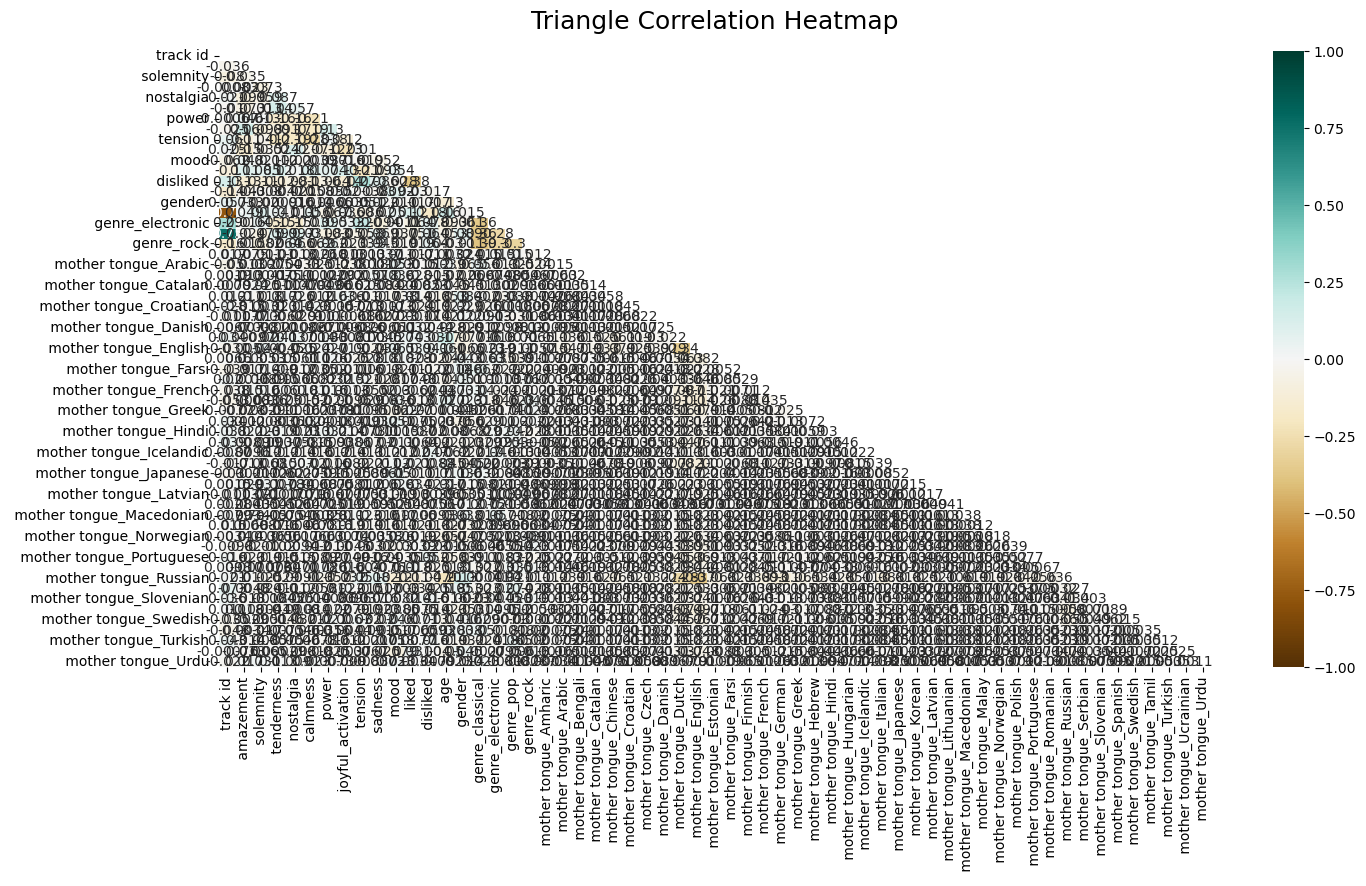

In [11]:
plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [12]:
yDF = df[" joyful_activation"]
xDF = df.drop(columns=[" joyful_activation"], axis=1)

print(xDF.columns)
xDF.head()

Index(['track id', ' amazement', ' solemnity', ' tenderness', ' nostalgia',
       ' calmness', ' power', ' tension', ' sadness', ' mood', ' liked',
       ' disliked', ' age', ' gender', ' genre_classical', ' genre_electronic',
       ' genre_pop', ' genre_rock', ' mother tongue_Amharic',
       ' mother tongue_Arabic', ' mother tongue_Bengali',
       ' mother tongue_Catalan', ' mother tongue_Chinese',
       ' mother tongue_Croatian', ' mother tongue_Czech',
       ' mother tongue_Danish', ' mother tongue_Dutch',
       ' mother tongue_English', ' mother tongue_Estonian',
       ' mother tongue_Farsi', ' mother tongue_Finnish',
       ' mother tongue_French', ' mother tongue_German',
       ' mother tongue_Greek', ' mother tongue_Hebrew', ' mother tongue_Hindi',
       ' mother tongue_Hungarian', ' mother tongue_Icelandic',
       ' mother tongue_Italian', ' mother tongue_Japanese',
       ' mother tongue_Korean', ' mother tongue_Latvian',
       ' mother tongue_Lithuanian', ' mothe

,track id,amazement,solemnity,tenderness,nostalgia,calmness,power,tension,sadness,mood,...,mother tongue_Romanian,mother tongue_Russian,mother tongue_Serbian,mother tongue_Slovenian,mother tongue_Spanish,mother tongue_Swedish,mother tongue_Tamil,mother tongue_Turkish,mother tongue_Ucrainian,mother tongue_Urdu
0,1,0,1,0,0,0,0,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,1,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,1,0,0,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,1,0,0,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,1,1,0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
pd.DataFrame(yDF)

,joyful_activation
0,1
1,0
2,0
3,0
4,0
...,...
8402,1
8403,1
8404,0
8405,1


In [14]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size=0.03,
    shuffle = True,
    stratify = yDF)

In [15]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.linear_model import LogisticRegression

parameters = [{'penalty':['l1','l2'], 
              'C':[1, 10, 100, 1000]}]
              #'C':[1, 10, 100, 1000]}]

gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/line

{'C': 100, 'penalty': 'l2'}

In [19]:
from sklearn.neural_network import MLPClassifier

parameters = parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'alpha': [0.0001, 0.05],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/clayford7

{'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}

In [20]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              }

              
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [21]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

gridSearch = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0
)

gridSearch.fit(xTrainScaled, yTrain)

rfParams = gridSearch.best_params_

rfParams


{'max_depth': 30, 'min_samples_split': 2}

In [22]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

gridSearch = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0
)

gridSearch.fit(xTrainScaled, yTrain)

knn_params = gridSearch.best_params_

knn_params


{'n_neighbors': 3, 'weights': 'distance'}

In [23]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

gridSearch = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0
)

gridSearch.fit(xTrainScaled, yTrain)

adaboost_params = gridSearch.best_params_

adaboost_params


{'learning_rate': 1.0, 'n_estimators': 200}

In [24]:
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = LogisticRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.8160637645616187    Recall=0.44110275689223055    FScore=0.5398773006134969
Completed Fold 1
    Accuracy=0.7976701410177806    Recall=0.42891566265060244    FScore=0.5189504373177843
Completed Fold 2
    Accuracy=0.8087063151440834    Recall=0.44358974358974357    FScore=0.5258358662613981
Completed Fold 3
    Accuracy=0.789086450030656    Recall=0.41294642857142855    FScore=0.5182072829131652
Completed Fold 4
    Accuracy=0.8098159509202454    Recall=0.4375    FScore=0.5303030303030303
Mean accuracy score: 0.8042685243348769
Mean f1 score: 0.526634783481775
Mean precision score: 0.6733133550239725
Mean recall score: 0.432810918340801


In [25]:
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9478847332924586    Recall=0.8847117794486216    FScore=0.8925410872313527
Completed Fold 1
    Accuracy=0.9411404046597179    Recall=0.8891566265060241    FScore=0.8848920863309351
Completed Fold 2
    Accuracy=0.9527896995708155    Recall=0.8923076923076924    FScore=0.9003880983182406
Completed Fold 3
    Accuracy=0.9564684242795831    Recall=0.90625    FScore=0.9195922989807475
Completed Fold 4
    Accuracy=0.9484662576687116    Recall=0.89    FScore=0.8944723618090452
Mean accuracy score: 0.9493499038942573
Mean f1 score: 0.8983771865340643
Mean precision score: 0.9044235764301968
Mean recall score: 0.8924852196524675


In [27]:
from sklearn.neural_network import MLPClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed Fold 0
    Accuracy=0.9288779889638259    Recall=0.8245614035087719    FScore=0.8501291989664082
Completed Fold 1
    Accuracy=0.923973022685469    Recall=0.8337349397590361    FScore=0.8480392156862745


/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed Fold 2
    Accuracy=0.9356223175965666    Recall=0.8923076923076924    FScore=0.8689138576779026


/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed Fold 3
    Accuracy=0.9393010423053342    Recall=0.8392857142857143    FScore=0.8836662749706229
Completed Fold 4
    Accuracy=0.9337423312883436    Recall=0.86    FScore=0.864321608040201
Mean accuracy score: 0.9323033405679079
Mean f1 score: 0.8630140310682819
Mean precision score: 0.8777161809290026
Mean recall score: 0.8499779499722429


/Users/clayford71/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = RandomForestClassifier(**rfParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9632127529123238    Recall=0.8721804511278195    FScore=0.9206349206349207
Completed Fold 1
    Accuracy=0.9546290619251993    Recall=0.8698795180722891    FScore=0.907035175879397
Completed Fold 2
    Accuracy=0.9601471489883507    Recall=0.8692307692307693    FScore=0.9125168236877523
Completed Fold 3
    Accuracy=0.9583077866339669    Recall=0.8727678571428571    FScore=0.9199999999999998
Completed Fold 4
    Accuracy=0.9521472392638037    Recall=0.8525    FScore=0.8973684210526316
Mean accuracy score: 0.9576887979447288
Mean f1 score: 0.9115110682509403
Mean precision score: 0.9604990918263147
Mean recall score: 0.8673117191147469


In [29]:
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = KNeighborsClassifier(**knn_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.9417535254445125    Recall=0.8721804511278195    FScore=0.8798988621997471
Completed Fold 1
    Accuracy=0.9386879215205396    Recall=0.8746987951807229    FScore=0.8789346246973366
Completed Fold 2
    Accuracy=0.947271612507664    Recall=0.8769230769230769    FScore=0.8883116883116884
Completed Fold 3
    Accuracy=0.9546290619251993    Recall=0.8973214285714286    FScore=0.9157175398633257
Completed Fold 4
    Accuracy=0.941717791411043    Recall=0.87    FScore=0.8798988621997472
Mean accuracy score: 0.9448119825617918
Mean f1 score: 0.8885523154543689
Mean precision score: 0.8991752154501471
Mean recall score: 0.8782247503606095


In [30]:
from sklearn.ensemble import AdaBoostClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = AdaBoostClassifier(**adaboost_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")
## Calculate the mean scores across all folds
mean_score = sum(accuracyScores) / len(accuracyScores)
print("Mean accuracy score:", mean_score)

mean_score = sum(f1Scores) / len(f1Scores)
print("Mean f1 score:", mean_score)

mean_score = sum(precisionScores) / len(precisionScores)
print("Mean precision score:", mean_score)

mean_score = sum(recallScores) / len(recallScores)
print("Mean recall score:", mean_score)

Completed Fold 0
    Accuracy=0.818516247700797    Recall=0.46616541353383456    FScore=0.5568862275449101
Completed Fold 1
    Accuracy=0.8099325567136726    Recall=0.4674698795180723    FScore=0.5558739255014327
Completed Fold 2
    Accuracy=0.8228080931943593    Recall=0.47435897435897434    FScore=0.5614567526555387
Completed Fold 3
    Accuracy=0.7946045370938075    Recall=0.43973214285714285    FScore=0.5404663923182442
Completed Fold 4
    Accuracy=0.8134969325153374    Recall=0.435    FScore=0.5337423312883436
Mean accuracy score: 0.8118716734435948
Mean f1 score: 0.5496851258616939
Mean precision score: 0.6912476659519097
Mean recall score: 0.4565452820536048
